In [1]:
# "magic commands" to enable autoreload of your imported packages
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [27]:
# Function to load specific datasets
def load_datasets(dataset):
    # Determine the current working directory
    current_dir = os.getcwd()
    
    # Create the path to the raw_data directory relative to the current directory
    base_dir = os.path.abspath(os.path.join(current_dir, "..", "raw_data"))
    
    # List of all files in the base directory
    all_files = os.listdir(base_dir)
    
    # Create the path to the dataset files
    dataset_files = [f for f in all_files if f.startswith(f"Dataset_{dataset[-1]}_")]
    
    datasets = {}
    for filename in dataset_files:
        file_path = os.path.join(base_dir, filename)
        # Key name for the dictionary
        key_name = filename.replace(f"Dataset_{dataset[-1]}_", '').replace('.csv', '')
        datasets[key_name] = pd.read_csv(file_path)

    return datasets

## Exploring Data Set A: 2023 US Civil Flights 2023

#### Load Data Set A

In [39]:
# Set varianle for data set A - US 2023 Kaggle Civil Flights
dataset_a = "Dataset_A"

# Load data set A
dataset_a_files = load_datasets(dataset_a)

#### Perform Basic EDA on Data Set A

In [42]:
#Inspect file head
for name, df in dataset_a_files.items():
    print(f"Dataset_A: {name}")
    print(df.head())
    print("\n")

Dataset_A: US2023_Kaggle_US_Flights_January 2024
   FlightDate  Day_Of_Week       Airline Tail_Number Dep_Airport  \
0  2023-01-02            1  Endeavor Air      N605LR         BDL   
1  2023-01-03            2  Endeavor Air      N605LR         BDL   
2  2023-01-04            3  Endeavor Air      N331PQ         BDL   
3  2023-01-05            4  Endeavor Air      N906XJ         BDL   
4  2023-01-06            5  Endeavor Air      N337PQ         BDL   

   Dep_CityName DepTime_label  Dep_Delay  Dep_Delay_Tag Dep_Delay_Type  ...  \
0  Hartford, CT       Morning         -3              0      Low <5min  ...   
1  Hartford, CT       Morning         -5              0      Low <5min  ...   
2  Hartford, CT       Morning         -5              0      Low <5min  ...   
3  Hartford, CT       Morning         -6              0      Low <5min  ...   
4  Hartford, CT       Morning         -1              0      Low <5min  ...   

  Flight_Duration       Distance_type  Delay_Carrier Delay_Weather 

In [43]:
# Check for missing values in each dataset in Dataset_A
for name, df in dataset_a_files.items():
    missing_values = df.isnull().sum()
    print(f"Missing values in Dataset_A - {name}:")
    print(missing_values)
    print("\n")
    

Missing values in Dataset_A - US2023_Kaggle_US_Flights_January 2024:
FlightDate            0
Day_Of_Week           0
Airline               0
Tail_Number           0
Dep_Airport           0
Dep_CityName          0
DepTime_label         0
Dep_Delay             0
Dep_Delay_Tag         0
Dep_Delay_Type        0
Arr_Airport           0
Arr_CityName          0
Arr_Delay             0
Arr_Delay_Type        0
Flight_Duration       0
Distance_type         0
Delay_Carrier         0
Delay_Weather         0
Delay_NAS             0
Delay_Security        0
Delay_LastAircraft    0
Manufacturer          0
Model                 0
Aicraft_age           0
dtype: int64


Missing values in Dataset_A - US2023_Kaggle_US_Flights_2023:
FlightDate            0
Day_Of_Week           0
Airline               0
Tail_Number           0
Dep_Airport           0
Dep_CityName          0
DepTime_label         0
Dep_Delay             0
Dep_Delay_Tag         0
Dep_Delay_Type        0
Arr_Airport           0
Arr_CityName   

In [44]:
# Check for duplicate records in each dataset in Dataset_A
for name, df in dataset_a_files.items():
    duplicates = df.duplicated().sum()
    print(f"Duplicate records in Dataset_A - {name}: {duplicates}")
    print("\n")


Duplicate records in Dataset_A - US2023_Kaggle_US_Flights_January 2024: 3


Duplicate records in Dataset_A - US2023_Kaggle_US_Flights_2023: 31


Duplicate records in Dataset_A - US2023_Kaggle_Weather_Meteo_By_Airport: 0


Duplicate records in Dataset_A - US2023_Kaggle_Cancelled_Diverted_2023: 945


Duplicate records in Dataset_A - US2023_Kaggle_Airports_Geolocation: 0




In [45]:
# Display statistical summary for each dataset in Dataset_A
for name, df in dataset_a_files.items():
    print(f"Statistical summary of Dataset_A - {name}:")
    print(df.describe())
    print("\n")

Statistical summary of Dataset_A - US2023_Kaggle_US_Flights_January 2024:
         Day_Of_Week      Dep_Delay  Dep_Delay_Tag      Arr_Delay  \
count  527197.000000  527197.000000   527197.00000  527197.000000   
mean        3.914855      12.840955        0.38288       7.776393   
std         2.077295      54.958138        0.48609      57.396811   
min         1.000000     -52.000000        0.00000     -80.000000   
25%         2.000000      -6.000000        0.00000     -15.000000   
50%         4.000000      -2.000000        0.00000      -5.000000   
75%         6.000000      10.000000        1.00000      11.000000   
max         7.000000    3024.000000        1.00000    3063.000000   

       Flight_Duration  Delay_Carrier  Delay_Weather      Delay_NAS  \
count    527197.000000  527197.000000  527197.000000  527197.000000   
mean        142.174665       5.425977       0.970540       3.242941   
std          73.880806      36.153713      18.004349      16.470654   
min          17.0000

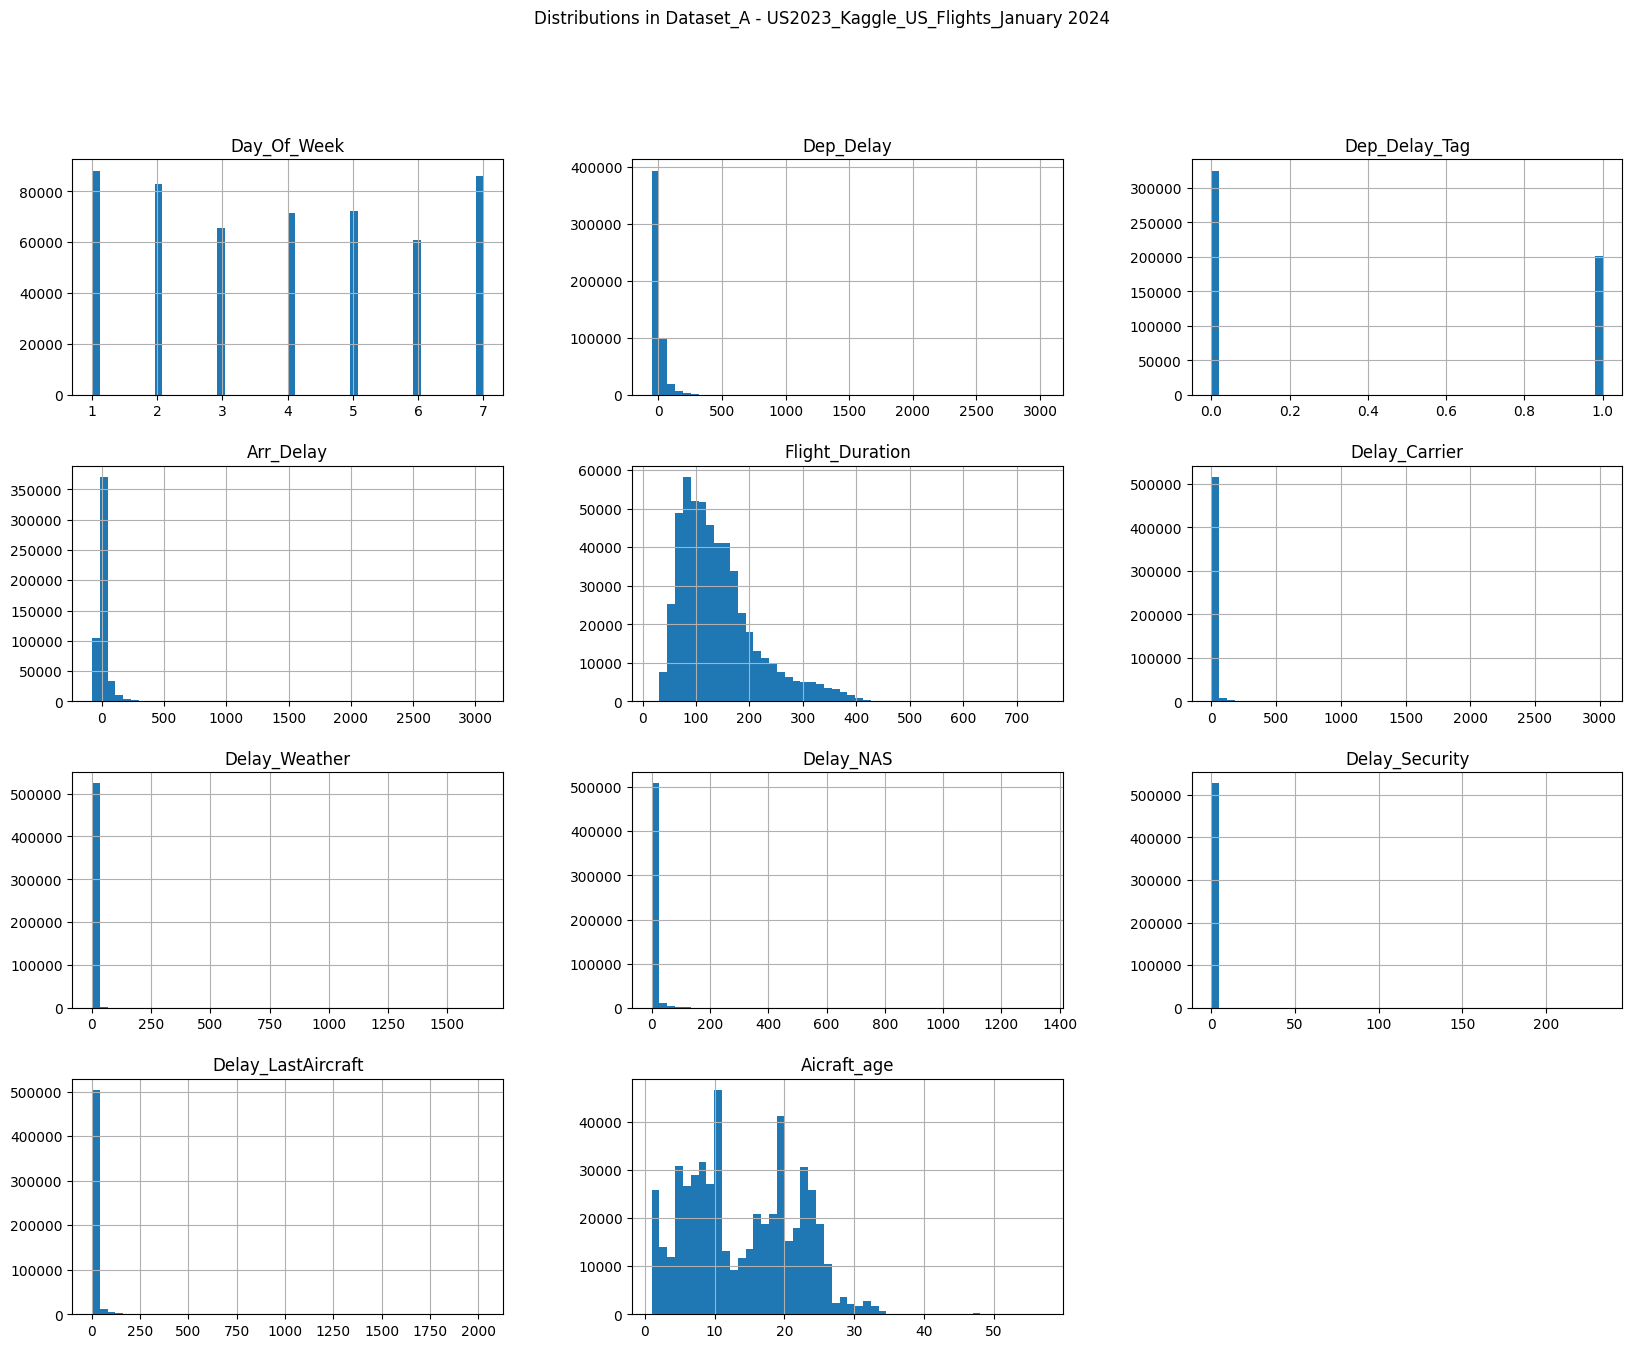

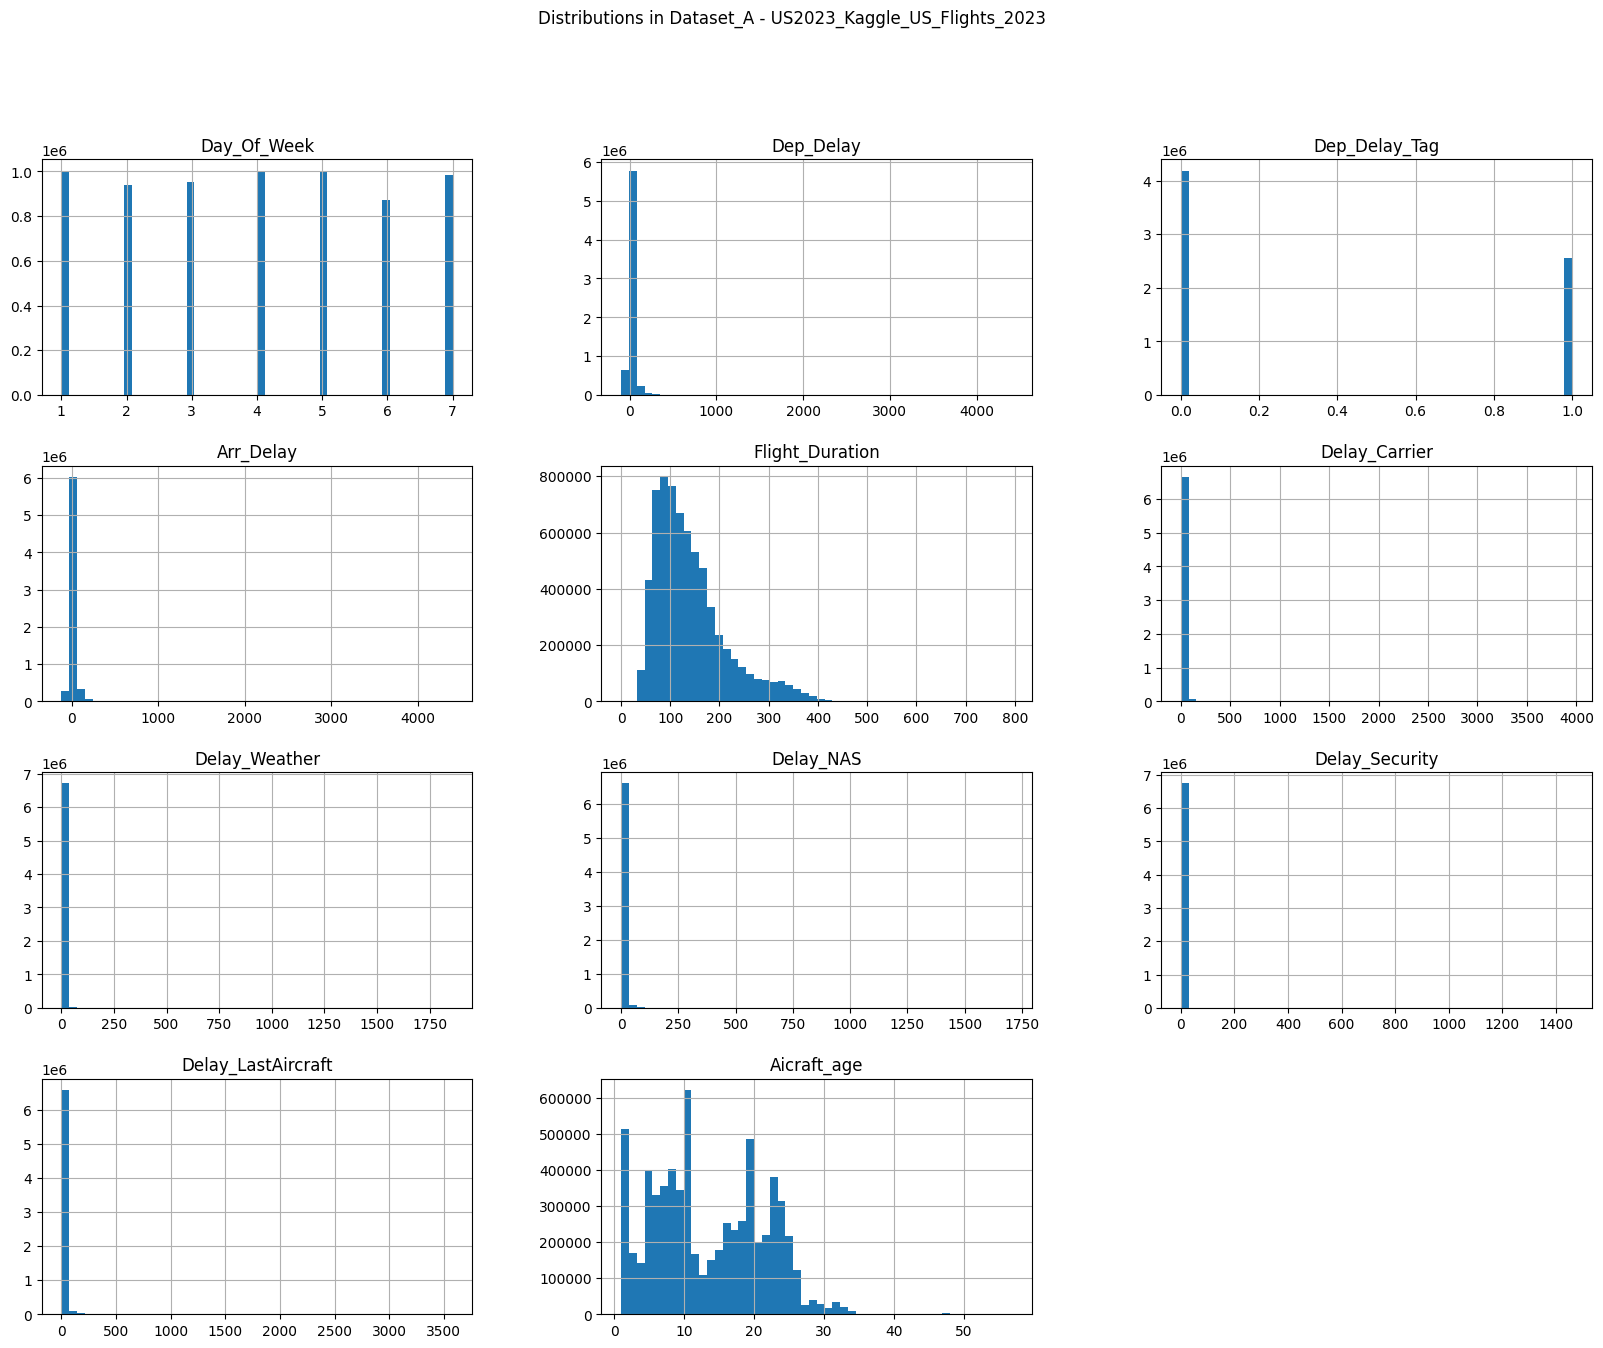

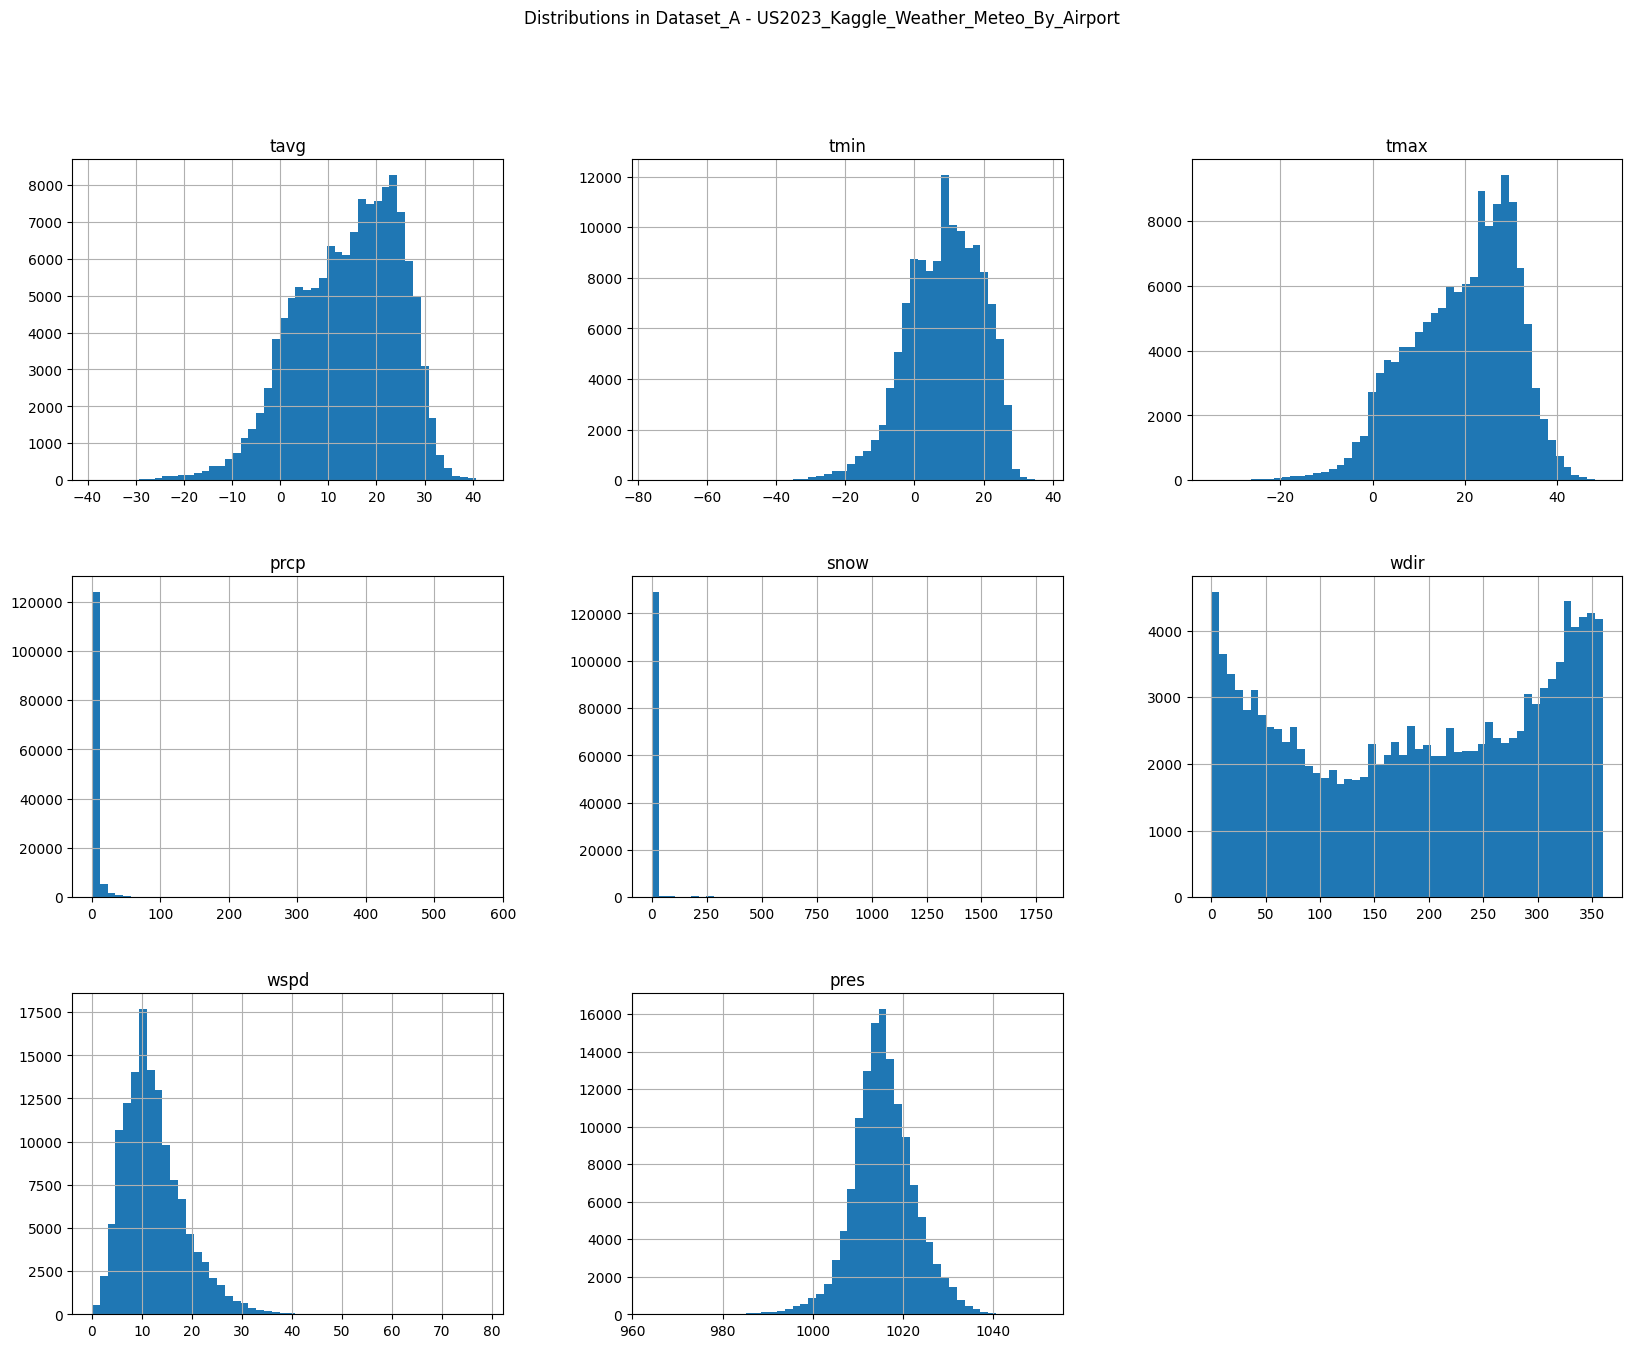

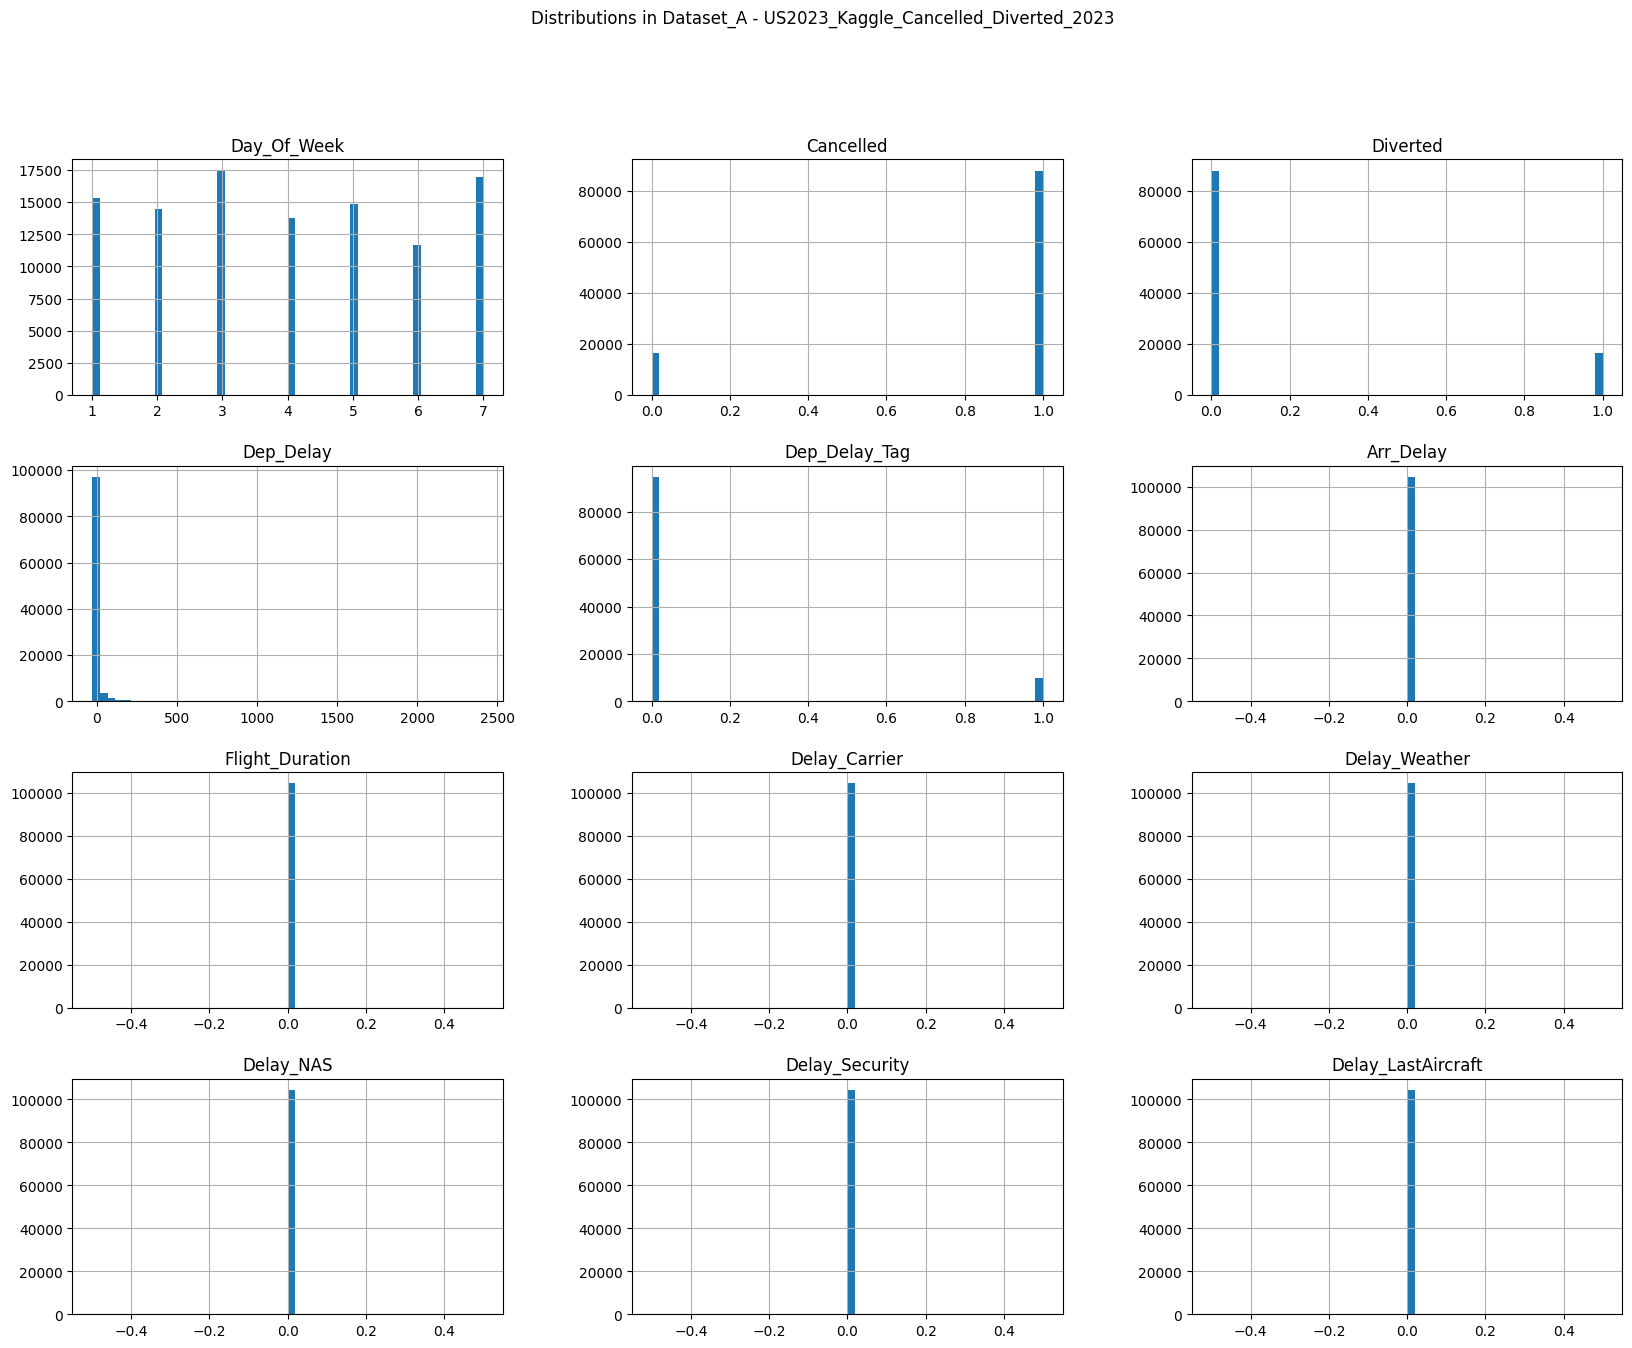

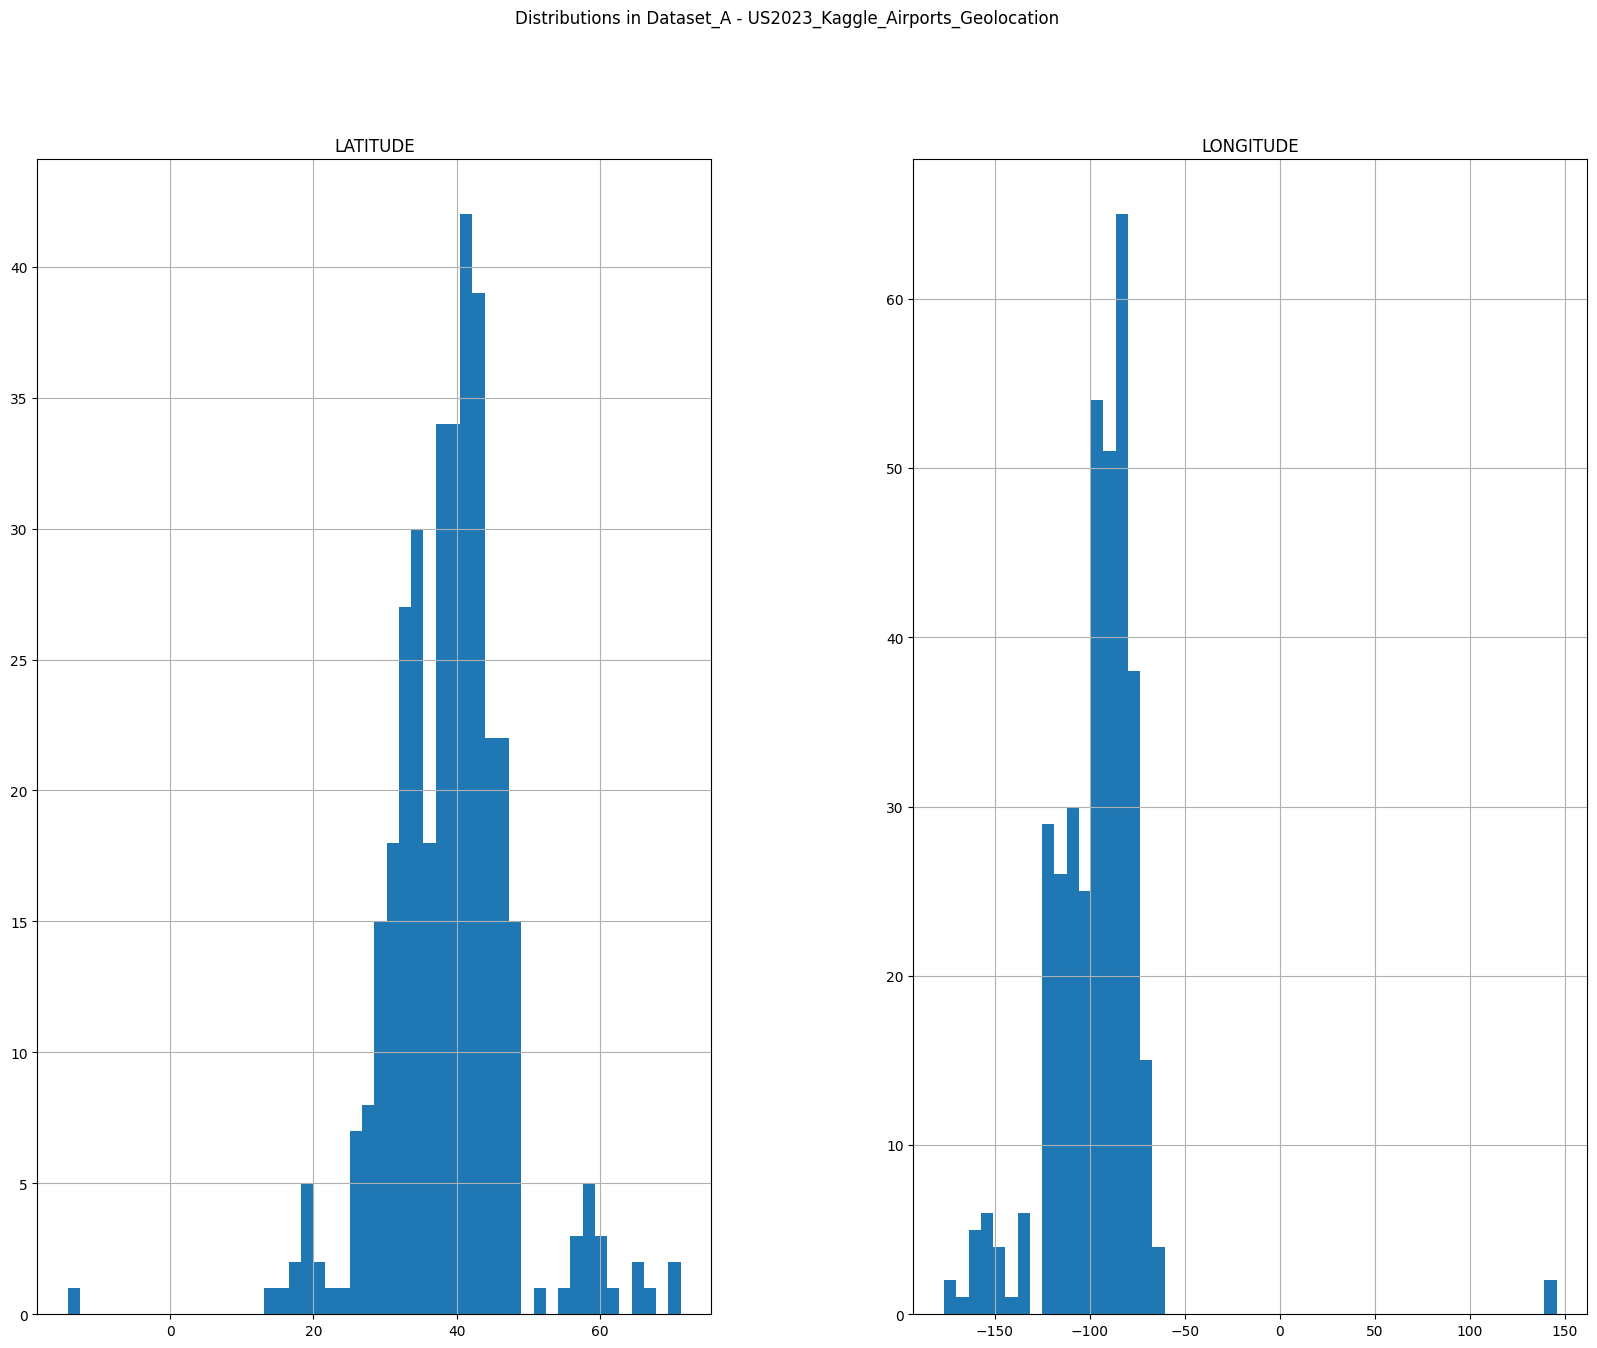

In [46]:
# Visualize distributions for each dataset in Dataset_A
for name, df in dataset_a_files.items():
    df.hist(bins=50, figsize=(20, 15))
    plt.suptitle(f"Distributions in Dataset_A - {name}")
    plt.show()